# Python and R

In [12]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [15]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
10583,72774,136556,6254,2020,2020_Pres-G_TX,TX,Pres-G,Pres-G,Swayable,543,Online,NaN,10/30/20,1151.0,Joseph R. Biden Jr.,13256,DEM,47.2,Donald Trump,13254,REP,51.2,1.2,-4.0,11/3/20,46.48,52.06,-5.58,1.58,1.0,NaN
4773,14858,19698,38,2008,2008_Pres-G_US,US,Pres-G,Pres-G,ABC News/The Washington Post,3,Live Phone,NaN,11/1/08,2470.0,Barack Obama,41,DEM,53.0,John McCain,44,REP,44.0,NaN,9.0,11/4/08,52.88,45.61,7.27,1.73,1.0,for The Washington Post
7461,62485,112339,1253,2014,2014_Gov-G_FL,FL,Gov-G,Gov-G,SEA Polling & Strategic Design,302,Live Phone,NaN,10/31/14,1800.0,Charlie Crist,8601,DEM,44.0,Rick Scott,8605,REP,47.0,5.0,-3.0,11/4/14,47.07,48.14,-1.08,-1.92,1.0,NaN
7099,33822,41011,18,2014,2014_Sen-G_MS,MS,Sen-G,Sen-G,YouGov,391,Online,NaN,10/20/14,654.0,Travis W. Childers,6314,DEM,28.0,Thad Cochran,6315,REP,50.0,NaN,-22.0,11/4/14,37.89,59.90,-22.01,0.01,1.0,for CBS News | New York Times
663,25718,117848,2482,2000,2000_House-G_MI-8,MI-8,House-G,House-G,EPIC-MRA,84,Live Phone,NaN,10/24/00,400.0,Dianne Byrum,13908,DEM,45.0,Mike Rogers,13909,REP,44.0,NaN,1.0,11/7/00,48.74,48.79,-0.05,1.05,0.0,NaN


The cell below loads the same data in R:

In [16]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [17]:
%%R

df_seina <- df %>% 
filter(pollster == 'Siena College/The New York Times Upshot')


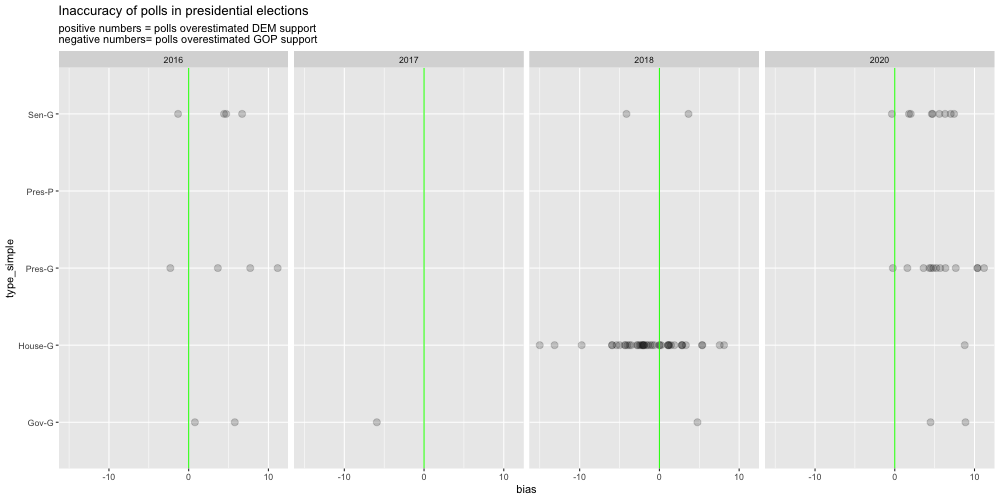

In [28]:
%%R -h 500 -w 1000

ggplot(df_seina) +
    aes(x=bias, y=type_simple) + 
    geom_point(size=3, alpha=.2) +
    geom_vline(aes(xintercept=0), color='green')  +
    facet_grid(~year) +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

In [29]:
%%R


df_seina <- df %>% 
filter(pollster == 'Siena College/The New York Times Upshot') %>%
mutate(error=abs(bias)) 



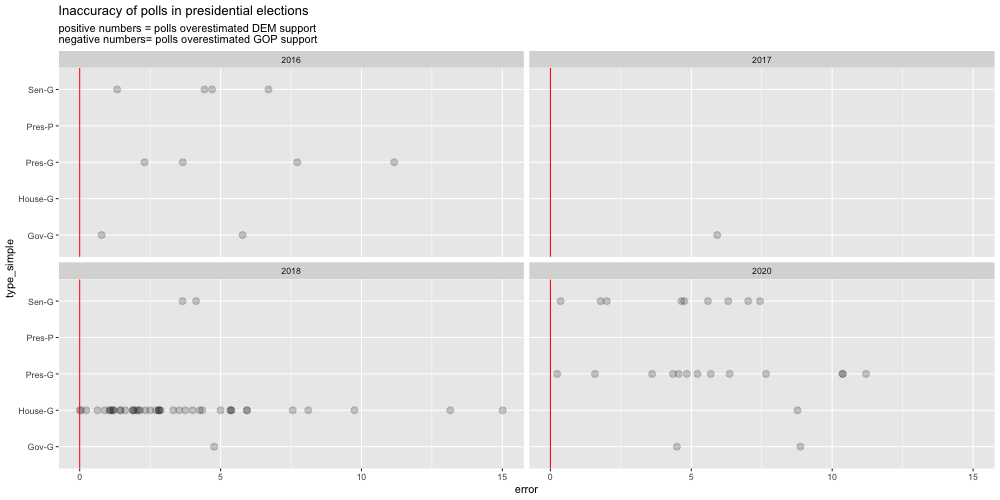

In [32]:
%%R -h 500 -w 1000

ggplot(df_seina) +
    aes(x=error, y=type_simple) + 
    geom_point(size=3, alpha=.2) +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    facet_wrap(~year) +
    theme(legend.position="none")

I forgot how you'd removed the type_simple for which there was no polling

👉 **Jayhawk Consulting**

In [57]:
%%R

df_jay <- df %>% 
filter(pollster == 'Jayhawk Consulting Services') %>%
mutate(error=abs(bias))

In [58]:
%%R

df_jay

# A tibble: 2 × 32
  poll_id question…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
    <dbl>      <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
1   36081      49015    5495  2014 2014… KS-1    House-G House-G Jayhaw…     157
2   56550      90986     330  2018 2018… KS-1    House-G House-G Jayhaw…     157
# … with 22 more variables: methodology <chr>, partisan <chr>, polldate <chr>,
#   samplesize <dbl>, cand1_name <chr>, cand1_id <dbl>, cand1_party <chr>,
#   cand1_pct <dbl>, cand2_name <chr>, cand2_id <dbl>, cand2_party <chr>,
#   cand2_pct <dbl>, cand3_pct <dbl>, margin_poll <dbl>, electiondate <chr>,
#   cand1_actual <dbl>, cand2_actual <dbl>, margin_actual <dbl>, bias <dbl>,
#   rightcall <dbl>, comment <chr>, error <dbl>, and abbreviated variable names
#   ¹​question_id, ²​location, ³​type_simple, ⁴​type_detail, ⁵​pollster, …
# ℹ Use `colnames()` to see all variable names


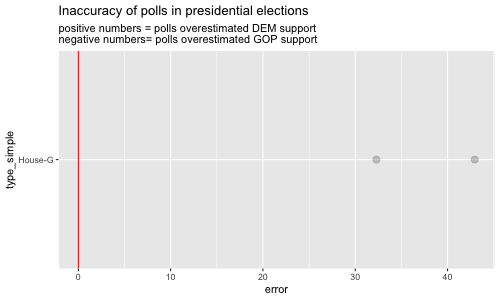

In [65]:
%%R -h 300 -w 500

df_jay <- df %>% 
filter(pollster == 'Jayhawk Consulting Services') %>%
mutate(error=abs(bias))

ggplot(df_jay) +
    aes(x=error, y=type_simple) + 
    geom_point(size=3, alpha=.2) +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

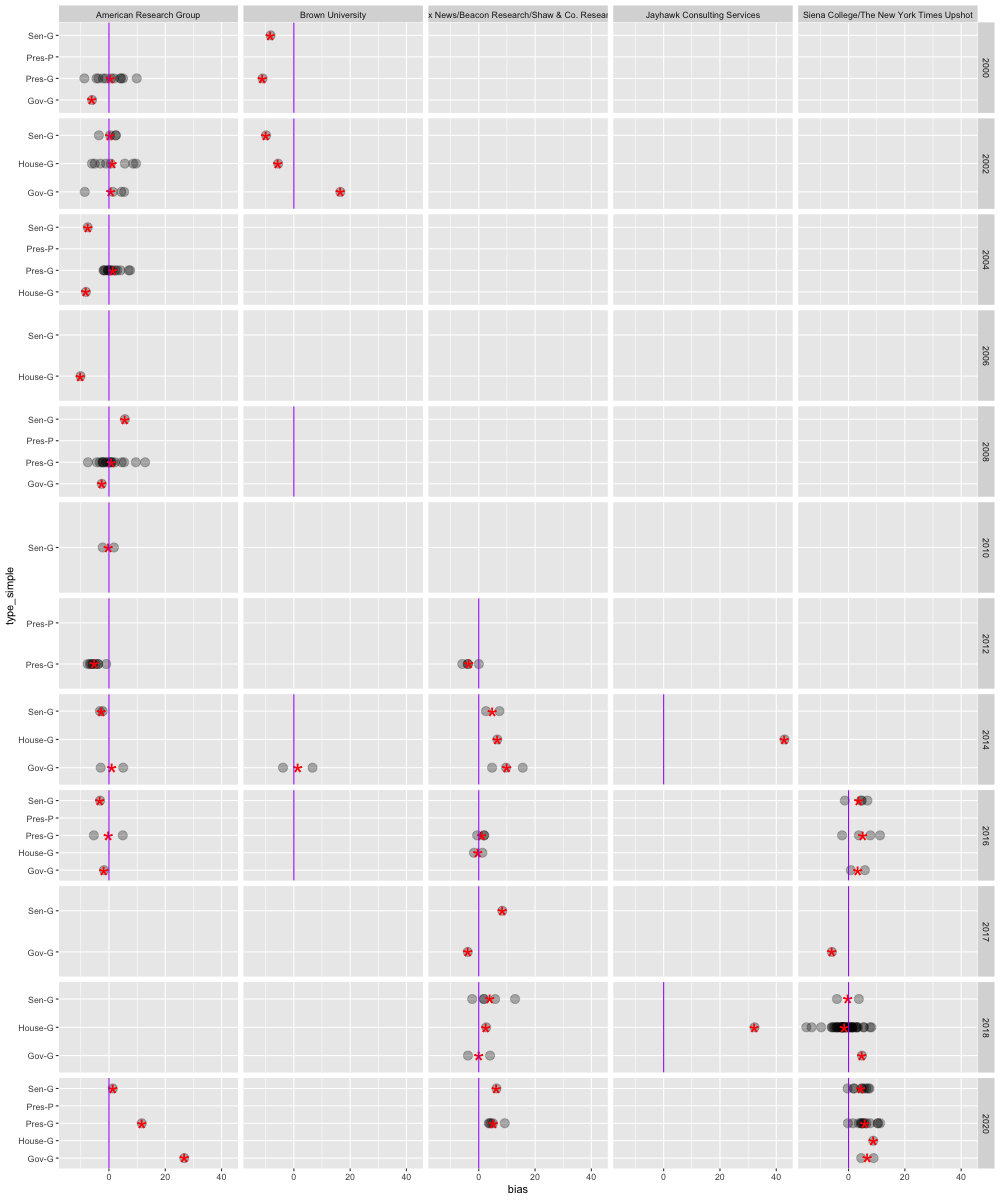

In [76]:
%%R -h 1200 -w 1000

pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services','Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 'American Research Group')

pollster_df <- df %>% filter(pollster %in% pollsters_i_want) %>%
mutate(error=abs(bias))

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='*',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_grid(year~pollster, scales='free_y')



In [ ]:
# filter the dataframe to pollster from Jayhawk Consulting

df_jay = df[df['pollster'] == 'Jayhawk Consulting Services']


👉 **Fox News/Beacon Research/Shaw & Co. Research**

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
